# DS-SF-34 | 05 | _k_-Nearest Neighbors | Codealong | Starter Code

In [4]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)


import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [5]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-05-iris.csv'))

In [11]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## Part A | Activity | Iris Dataset | Exploratory Data Analysis

In [6]:
color = df.Species.map({'Setosa': 'red', 'Versicolor': 'green', 'Virginica': 'blue'})

In [7]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


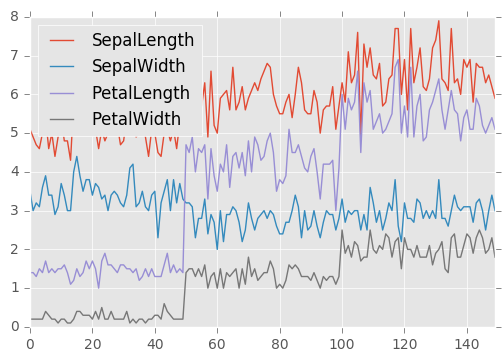

In [8]:
df.plot.line()

In [13]:
df.plot.scatter

<bound method FramePlotMethods.scatter of <pandas.tools.plotting.FramePlotMethods object at 0x1176081d0>>

In [16]:
df[ ['Species', 'SepalLength'] ] # by column names; DataFrame

,Species,SepalLength
0,Setosa,5.1
1,Setosa,4.9
2,Setosa,4.7
3,Setosa,4.6
4,Setosa,5.0
...,...,...
145,Virginica,6.7
146,Virginica,6.3
147,Virginica,6.5
148,Virginica,6.2


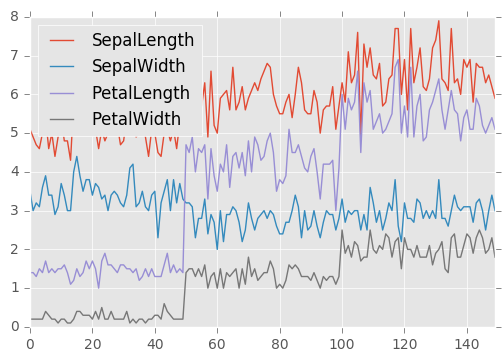

In [17]:
df.plot.line()

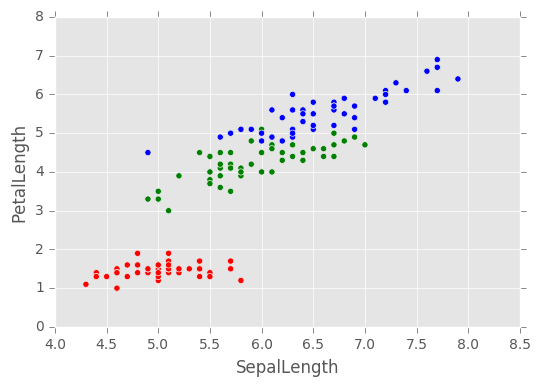

In [24]:
#Setosa have short petals in comparison to their Sepals 
df.plot(kind='scatter', x='SepalLength', y='PetalLength', c = color)

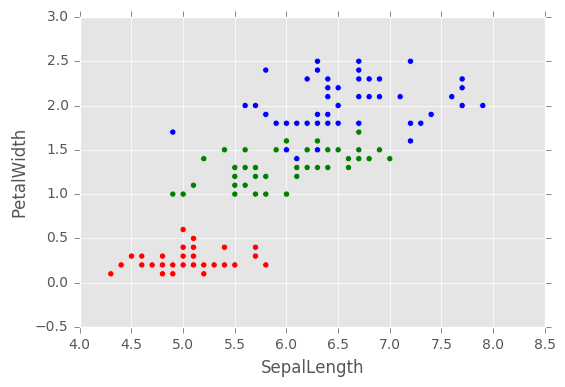

In [25]:
df.plot(kind='scatter', x='SepalLength', y='PetalWidth', c = color)

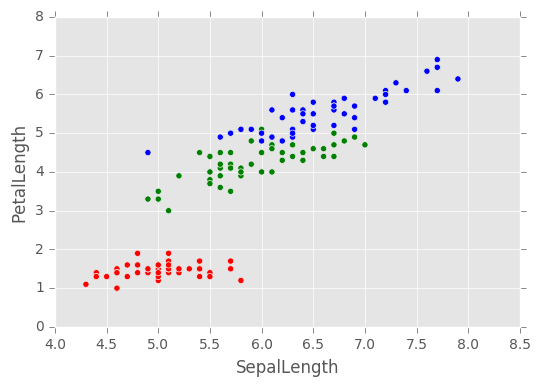

In [27]:
df.plot(kind='scatter', x='SepalLength', y='PetalLength', c = color)

In [36]:
def my_first_classifier(row):
    if "PetalLength" < 2: 
        return "Setosa"

    elif "PetalLength" < 5:
        return "Versicolor"
    
    else: 
        return "Virginica"
    

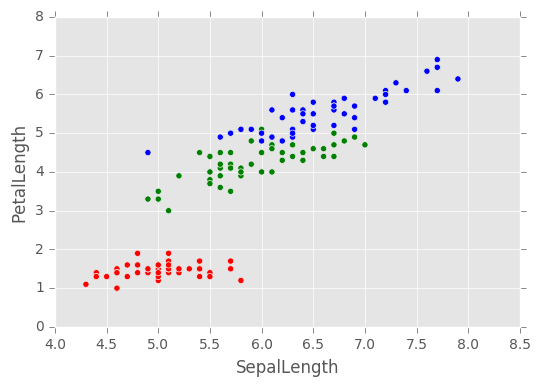

In [38]:
df.plot(kind='scatter', x='SepalLength', y='PetalLength', c = color)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119d76438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a3f30b8>]], dtype=object)

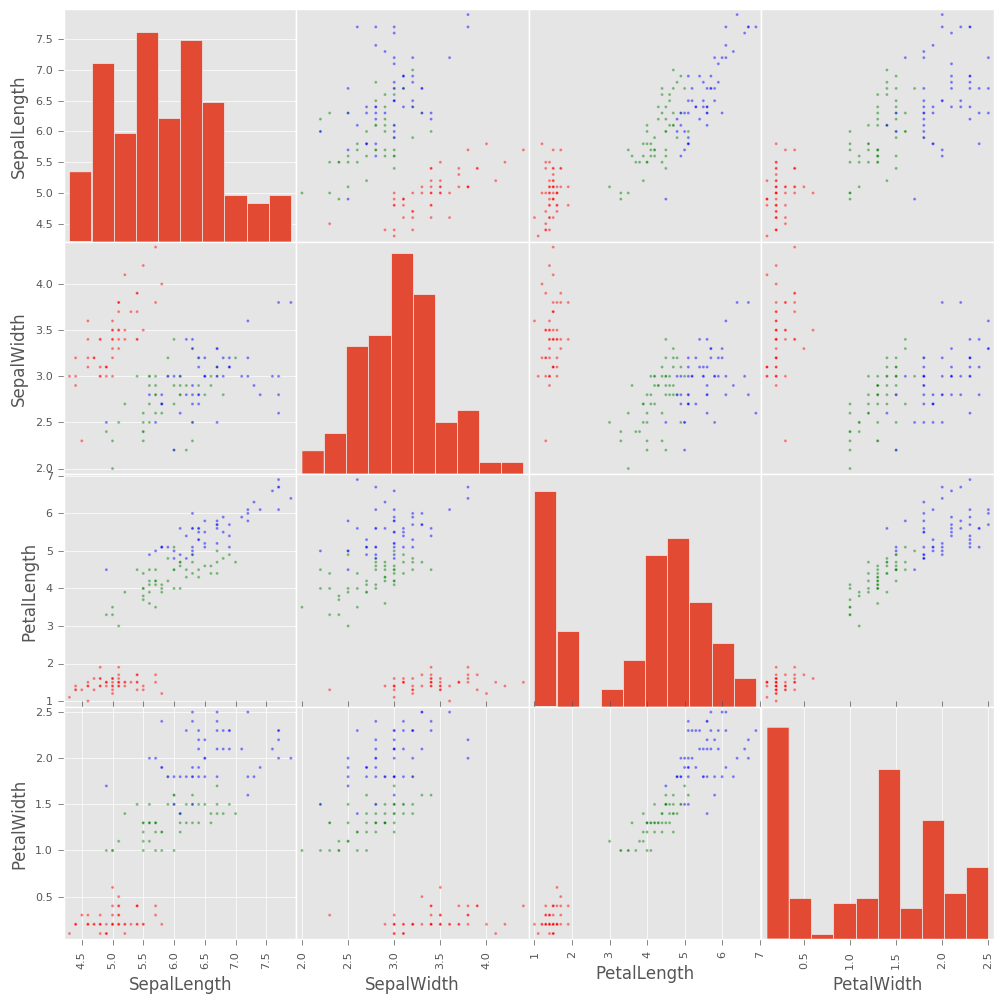

In [39]:
pd.tools.plotting.scatter_matrix(df[ ['SepalLength','SepalWidth','PetalLength','PetalWidth']], c = color, figsize = (12, 12) )

## Part B | Activity | Hand-Coded Classifier

In [40]:
c = df.Species

In [41]:
c_hat = df.apply(my_first_classifier, axis = 1)

c_hat

TypeError: ('unorderable types: str() < int()', 'occurred at index 0')

In [ ]:
(c_hat != c).sum()

In [ ]:
pd.crosstab(c_hat, c, rownames = ['Hypothesized Class'], colnames = ['True Class'])

## Part C | Classification Metrics

### Accuracy

In [43]:
# TODO

(c_hat == c).mean()

NameError: name 'c_hat' is not defined

### Misclassification rate

In [ ]:
# TODO
(c_hat !=c.mean())

## Part D | _k_-Nearest Neighbors (_k_-NN)

### Feature matrix and response vector

- (http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [ ]:
columns_X = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
X = df[columns_X]

scaler = preprocessing.MinMaxScaler().fit(X)

X = scaler.transform(X)

In [ ]:
# TODO

In [30]:
c = df.Species

In [31]:
c

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: Species, dtype: object

### _k_-Nearest Neighbors

- (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [32]:
model = neighbors.KNeighborsClassifier(n_neighbors = 1).\
    fit(X, c)

NameError: name 'X' is not defined

You can measure the precision of your prediction with `.score()`

In [ ]:
model.score(X, c)

In [ ]:
c_hat = model.predict(X)

In [ ]:
(c_hat == c).mean()

In [ ]:
pd.crosstab(c_hat, c, rownames = ['Hypothesized Class'], colnames = ['True Class'])

### Train/test sets

- (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html)

50% of the dataset to train the model; the rest to test the model

In [ ]:
train_df = df.sample(frac = .5, random_state = 0).sort_index()

In [ ]:
train_df

In [ ]:
test_df = df.drop(train_df.index)

### Feature matrix `train_X` and response vector `train_c`

In [ ]:
train_X = train_df[columns_X]

scaler = preprocessing.MinMaxScaler().fit(train_X)
train_X = scaler.transform(train_X)

train_c = train_df.Species

### Feature matrix `test_X` and response vector `test_c`

- (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
- (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

In [ ]:
# TODO

In [ ]:
k_cv = 5 # 5-fold CV
k_nn = range(1, train_df.shape[0] * (k_cv - 1) / k_cv) # k-NN

gs = model_selection.GridSearchCV(
    estimator = neighbors.KNeighborsClassifier(),
    param_grid = {'n_neighbors': k_nn, 'weights': ['uniform', 'distance']},
    cv = model_selection.KFold(n_splits = k_cv, shuffle = True, random_state = 0)
)

gs.fit(train_X, train_c)

In [ ]:
gs.cv_results_

In [ ]:
gs.cv_results_.keys()

In [ ]:
gs.best_score_

In [ ]:
gs.best_params_

In [ ]:
gs.best_estimator_

In [ ]:
gs.score(train_X, train_c)

In [ ]:
gs.score(test_X, test_c)

## Final model

In [ ]:
# TODO